In [49]:
import torch
from torch import nn, optim, max
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import numpy as np

In [24]:
batch_size = 12

train_data = datasets.MNIST('datasets', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('datasets', train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size = batch_size)

In [56]:
class MLP_h(nn.Module):
    def __init__(self, hidden_units):
        super().__init__()

        self.in_dim = 28*28
        self.out_dim = 10

        self.l_layers = nn.ModuleList()
        self.l_layers.append(nn.Linear(self.in_dim, hidden_units[0]))
        for i in range(len(hidden_units) - 1):
            self.l_layers.append(nn.Linear(hidden_units[i], hidden_units[i + 1]))
        self.l_layers.append(nn.Linear(hidden_units[-1], self.out_dim))

        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()

    def forward(self, x):
        a = x.view(-1, self.in_dim)
        for l in range(len(self.l_layers)):
            z = self.l_layers[l](a)
            if l == len(self.l_layers) - 1:
                logit = z
            else:
                a = self.relu(z)
        return logit

In [65]:
def train_and_eval(hidden_units, epochs=10, lr=0.01):
    model = MLP_h(hidden_units)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if (i+1) % 2000 == 0:
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss/2000))
                running_loss = 0.0
    
    n_predict = 0
    n_correct = 0
    
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            n_predict += len(predicted)
            n_correct += (labels == predicted).sum().item()  # .item() to get scalar value

    accuracy = n_correct / n_predict
    return accuracy

In [66]:
hidden_units_list = [
    [512, 256],            # 2 layers
    [512, 256, 128],       # 3 layers
    [512, 256, 128, 64],   # 4 layers
    [512, 256, 128, 64, 32] # 5 layers
]

accuracies = []
num_layers = [2, 3, 4, 5]

In [67]:
for hidden_units in hidden_units_list:
    accuracy = train_and_eval(hidden_units)
    accuracies.append(accuracy)
    print(f"Accuracy for {len(hidden_units)} layers: {accuracy:.4f}")

[1,  2000] loss: 1.028
[1,  4000] loss: 0.354
[2,  2000] loss: 0.267
[2,  4000] loss: 0.239
[3,  2000] loss: 0.193
[3,  4000] loss: 0.171
[4,  2000] loss: 0.145
[4,  4000] loss: 0.133
[5,  2000] loss: 0.117
[5,  4000] loss: 0.109
[6,  2000] loss: 0.098
[6,  4000] loss: 0.087
[7,  2000] loss: 0.076
[7,  4000] loss: 0.080
[8,  2000] loss: 0.066
[8,  4000] loss: 0.064
[9,  2000] loss: 0.052
[9,  4000] loss: 0.059
[10,  2000] loss: 0.049
[10,  4000] loss: 0.050
Accuracy for 2 layers: 0.9785
[1,  2000] loss: 1.508
[1,  4000] loss: 0.419
[2,  2000] loss: 0.291
[2,  4000] loss: 0.230
[3,  2000] loss: 0.172
[3,  4000] loss: 0.161
[4,  2000] loss: 0.126
[4,  4000] loss: 0.113
[5,  2000] loss: 0.093
[5,  4000] loss: 0.089
[6,  2000] loss: 0.076
[6,  4000] loss: 0.074
[7,  2000] loss: 0.061
[7,  4000] loss: 0.057
[8,  2000] loss: 0.050
[8,  4000] loss: 0.048
[9,  2000] loss: 0.038
[9,  4000] loss: 0.043
[10,  2000] loss: 0.032
[10,  4000] loss: 0.034
Accuracy for 3 layers: 0.9755
[1,  2000] loss:

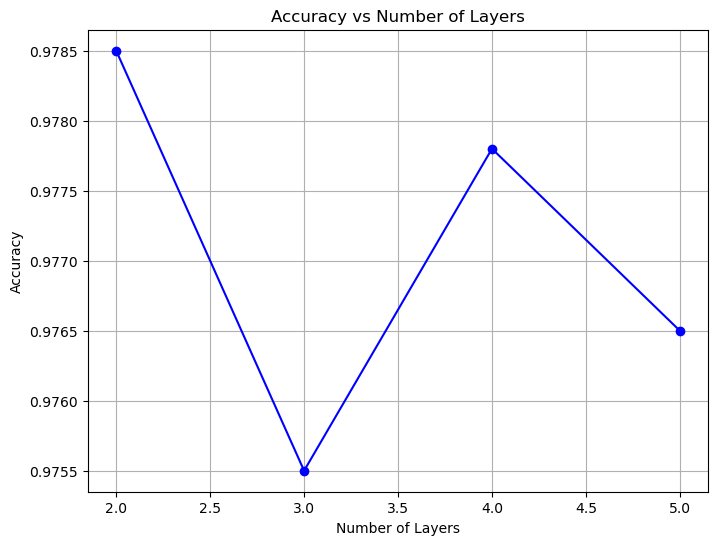

In [68]:
plt.figure(figsize=(8, 6))
plt.plot(num_layers, accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs Number of Layers")
plt.xlabel("Number of Layers")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("acc_vs_layers.png")

In [22]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

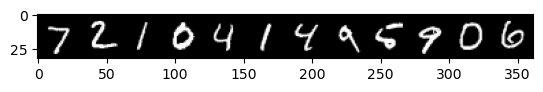

GroundTruth
     7     2     1     0     4     1     4     9     5     9     0     6
Prediction
     7     2     1     0     4     1     4     9     6     9     0     6


In [45]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images, nrow = batch_size))
print('GroundTruth')
print("   "+'   '.join('%3s' % label.item() for label in labels))

outputs = model(images)
_, predicted = max(outputs, 1)
print("Prediction")
print("   "+'   '.join('%3s' % label.item() for label in predicted))